In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import husl

In [2]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

colors = [(257, 71, 27)]
palette = sns.color_palette([husl.husl_to_hex(*x) for x in colors])

In [3]:
folder = '/Users/martin/Dropbox/Academia/Data/Geo/Prague/Clustering/'

In [4]:
sampled_bic = pd.read_csv(folder + 'sampled/sampled_Prague_bic.csv', index_col=0)

In [5]:
detail_bic = pd.read_csv(folder + 'complete data/BIC_detail_15-25.csv', index_col=0)

In [5]:
sampled_bic.tail()

,n,bic,run,sample
456,29.0,2.009808e+07,2.0,1.0
457,29.0,2.040600e+07,2.0,1.0
458,29.0,2.025015e+07,2.0,1.0
459,32.0,2.035578e+07,2.0,1.0
460,32.0,2.037078e+07,2.0,1.0


In [6]:
bic = sampled_bic.loc[sampled_bic['sample'] == 1].copy()

In [12]:
bic.head()

,n,bic,run,sample
351,2.0,4.428249e+07,0.0,1.0
352,2.0,4.428250e+07,0.0,1.0
353,2.0,4.428250e+07,0.0,1.0
354,5.0,3.110199e+07,0.0,1.0
355,5.0,2.997800e+07,0.0,1.0


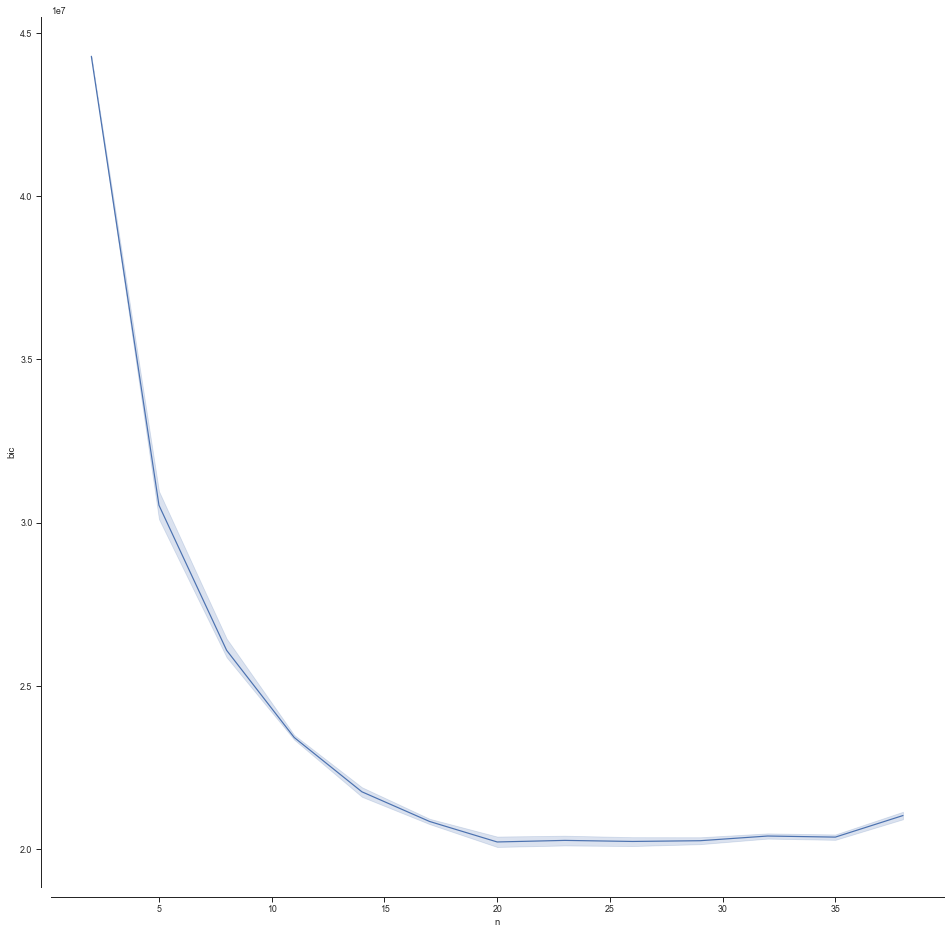

In [8]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)

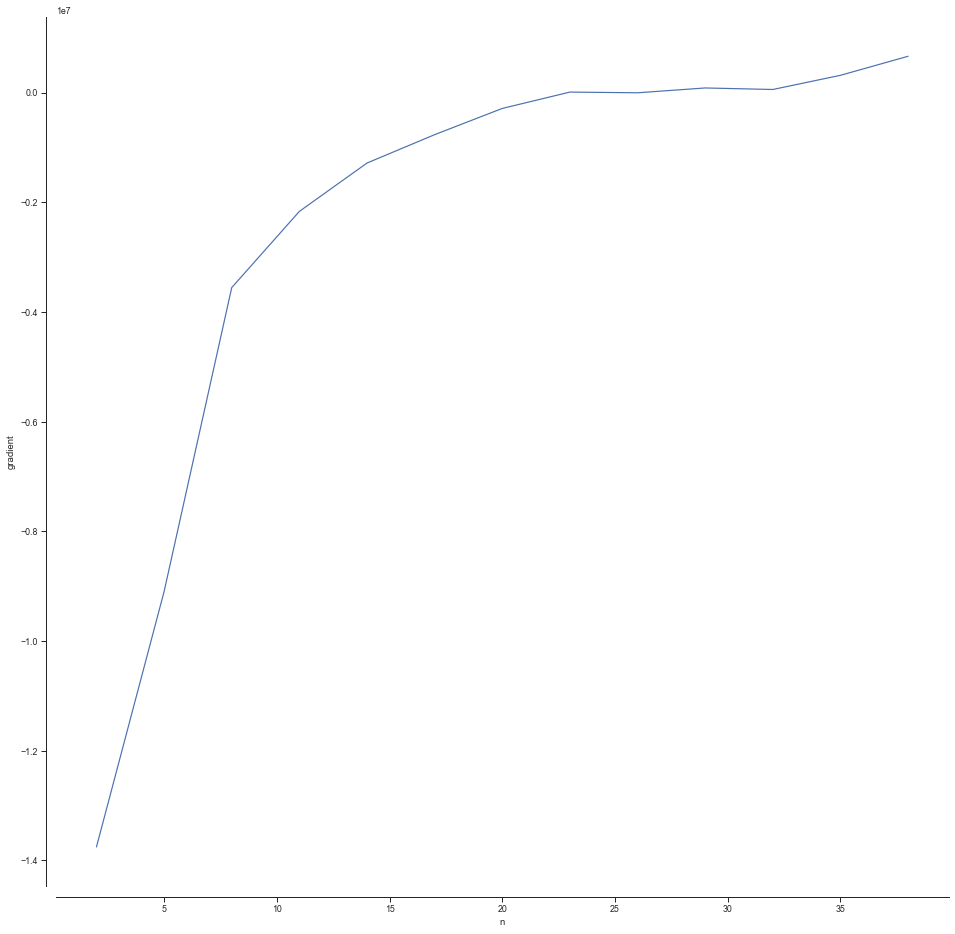

In [9]:
gradient = []
group = bic.groupby(['n']).mean()
group['gradient'] = np.gradient(group.bic)

group.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="gradient",
             data=group, palette=palette)
sns.despine(offset=10)

### add detail

In [13]:
detail_bic.head()

,n,bic,run
0,15.0,2.089856e+07,0.0
1,15.0,2.122983e+07,1.0
2,15.0,2.088522e+07,2.0
3,16.0,2.073446e+07,0.0
4,16.0,2.135892e+07,1.0


In [7]:
detail_bic['sample'] = 1.0

In [8]:
bic = bic.append(detail_bic).reset_index(drop=True)

In [19]:
bic

,n,bic,run,sample
0,2.0,4.428249e+07,0.0,1.0
1,2.0,4.428250e+07,0.0,1.0
2,2.0,4.428250e+07,0.0,1.0
3,5.0,3.110199e+07,0.0,1.0
4,5.0,2.997800e+07,0.0,1.0
...,...,...,...,...
138,24.0,1.974298e+07,1.0,1.0
139,24.0,2.050401e+07,2.0,1.0
140,25.0,2.038224e+07,0.0,1.0
141,25.0,2.075189e+07,1.0,1.0


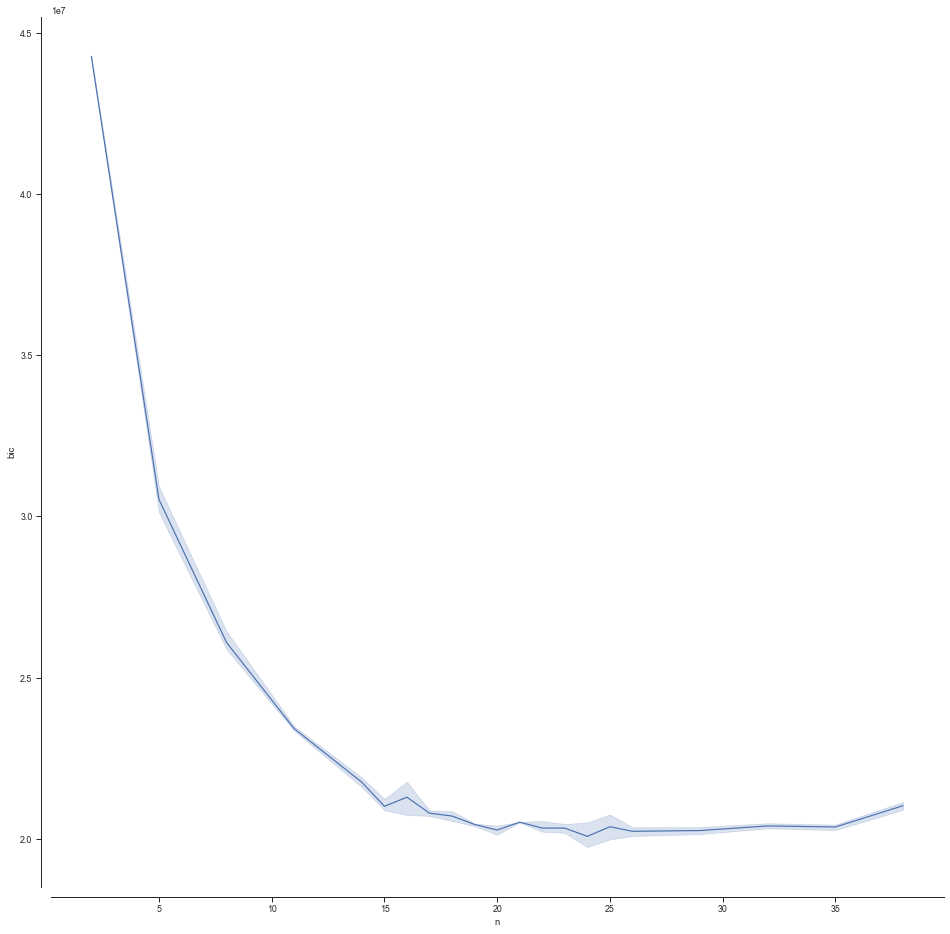

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)

In [22]:
gradient = []
group = bic.groupby(['n']).mean()
group['gradient'] = np.gradient(group.bic)

group.reset_index(inplace=True)

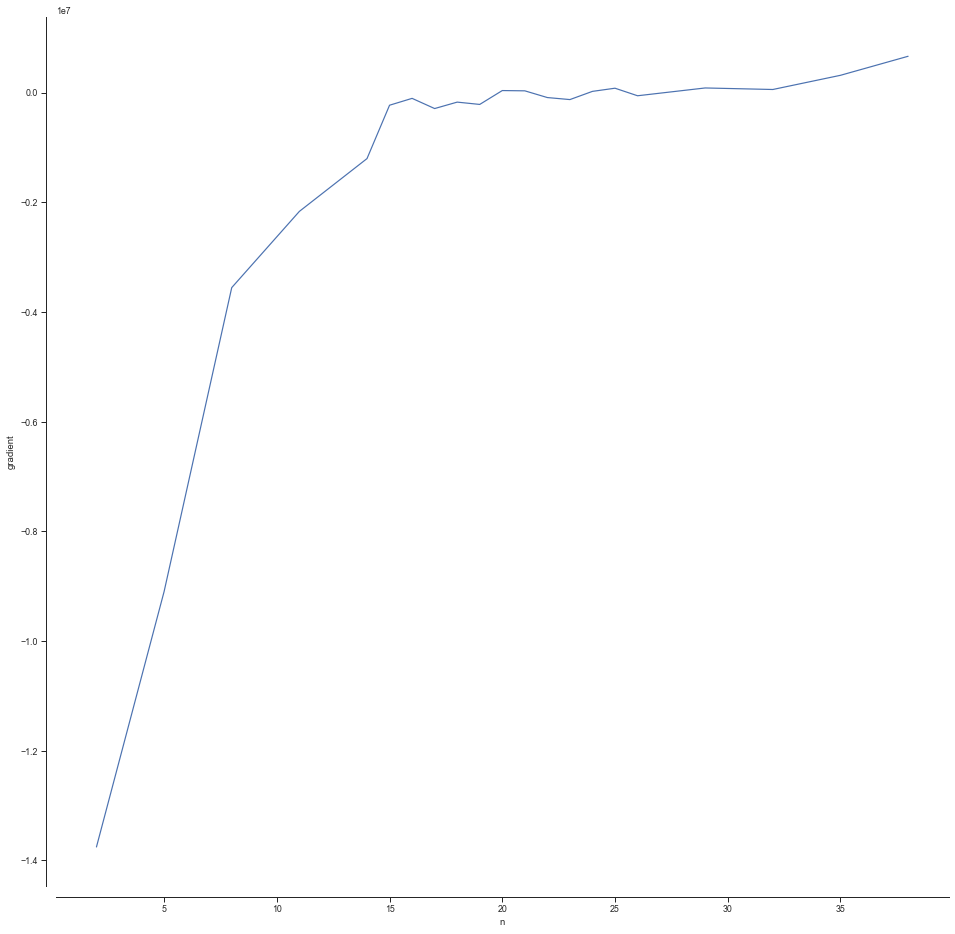

In [23]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="gradient",
             data=group, palette=palette)
sns.despine(offset=10)

It seems that 15 clusters could be the optimum. All values higher that that do not bring any significant additional precision into the model.

**CORRECTION:**  the plot above is incorrect as gradient is not computed from the same distances.

### add 10-14 detail

In [10]:
detail_bic10 = pd.read_csv(folder + 'complete data/BIC_detail_10-14.csv', index_col=0)

In [11]:
bic = bic.append(detail_bic10).reset_index(drop=True)

In [26]:
bic

,n,bic,run,sample
0,2.0,4.428249e+07,0.0,1.0
1,2.0,4.428250e+07,0.0,1.0
2,2.0,4.428250e+07,0.0,1.0
3,5.0,3.110199e+07,0.0,1.0
4,5.0,2.997800e+07,0.0,1.0
...,...,...,...,...
153,13.0,2.204217e+07,1.0,NaN
154,13.0,2.210913e+07,2.0,NaN
155,14.0,2.203114e+07,0.0,NaN
156,14.0,2.224066e+07,1.0,NaN


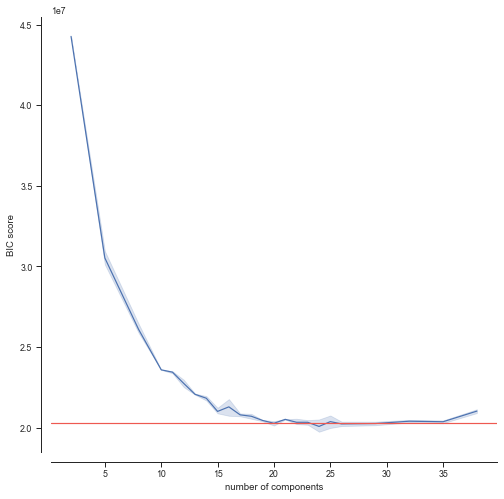

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)
plt.axhline(2.026849e+07, color=husl.husl_to_hex(14, 79, 58))
plt.xlabel('number of components')
plt.ylabel('BIC score')
plt.savefig('figures/complete_bic.pdf', bbox_inches='tight')

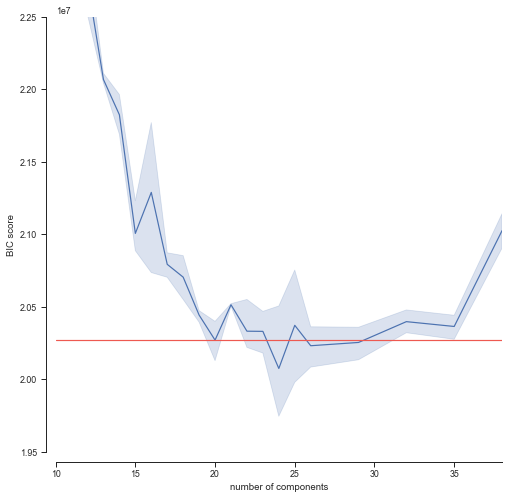

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)
plt.axhline(2.026849e+07, color=husl.husl_to_hex(14, 79, 58))
plt.ylim(1.95e+07, 2.25e+07)
plt.xlim(10, 38)
plt.xlabel('number of components')
plt.ylabel('BIC score')
plt.savefig('figures/complete_bic_detail.pdf', bbox_inches='tight')

In [31]:
gradient = []
group = bic.groupby(['n']).mean()
group['gradient'] = np.gradient(group.bic)

group.reset_index(inplace=True)

In [32]:
group

,n,bic,run,sample,gradient
0,2.0,4.428250e+07,1.000,1.0,-1.375481e+07
1,5.0,3.052768e+07,1.000,1.0,-9.098574e+06
2,8.0,2.608535e+07,1.000,1.0,-3.470827e+06
3,10.0,2.358603e+07,1.000,NaN,-1.322509e+06
4,11.0,2.344033e+07,1.000,1.0,-4.229847e+05
5,12.0,2.274006e+07,1.000,NaN,-6.871147e+05
6,13.0,2.206610e+07,1.000,NaN,-4.587134e+05
7,14.0,2.182263e+07,1.000,1.0,-5.307815e+05
8,15.0,2.100454e+07,1.000,1.0,-2.676163e+05
9,16.0,2.128740e+07,1.000,1.0,-1.066598e+05


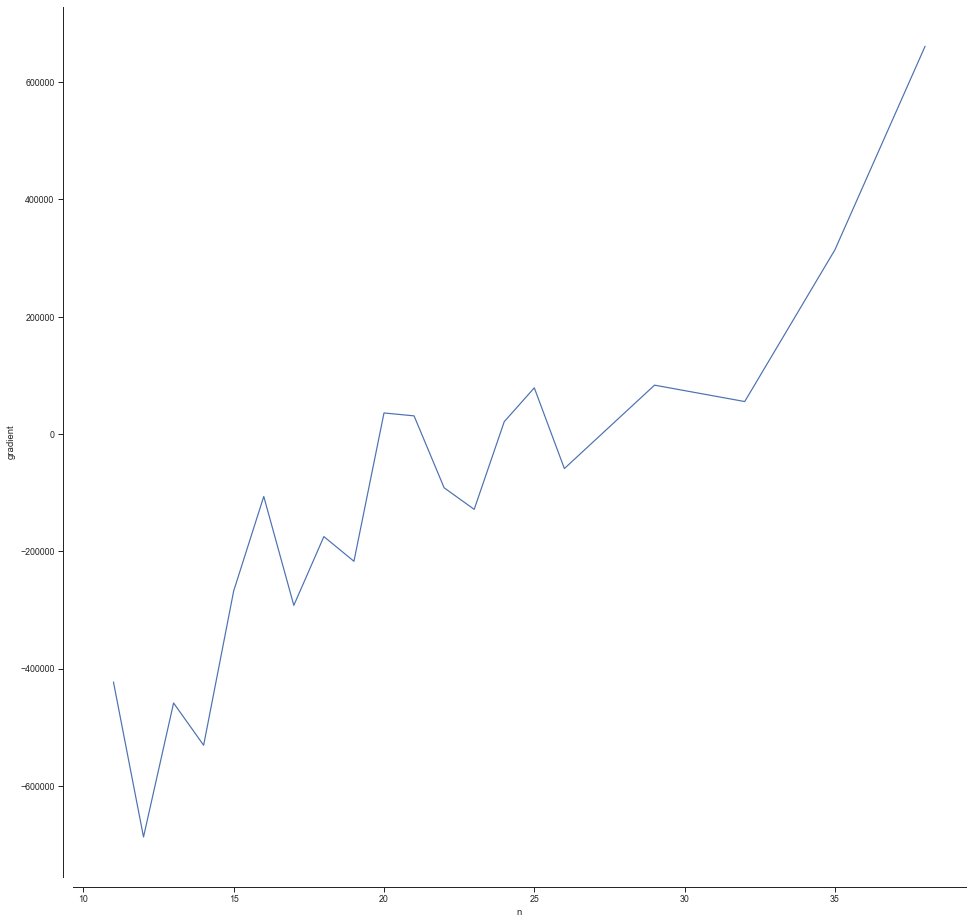

In [34]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="gradient",
             data=group.loc[4:], palette=palette)
sns.despine(offset=10)

Based on the BIC plot above, 20 seems to be the ideal. It is the first significant minimum.